In [6]:
#hide
%load_ext autoreload
%autoreload 2

In [8]:
from deeptracktorch.disp import *
from deeptracktorch.simg import *
from deeptracktorch.video import track_single_particle
from deeptracktorch.measures import radialcenter
from fastai.vision import *
from sklearn.metrics import mean_squared_error, mean_absolute_error

# If training the network

Set the experimental params

In [7]:
from numpy.random import normal, uniform, choice, randint
from numpy import pi

exp_dist = {   
    'cx': lambda: normal(0., 2),
    'cy': lambda: normal(0., 2),
    'radius': lambda: uniform(2, 3),
    'intensities': lambda: [uniform(.7, .9, 1), -uniform(.2, .3, 1)],
    'bessel_orders': lambda: [1, 2]    ,
    'ellip_direction': lambda: uniform(-pi, pi),
    'ellipticity':  lambda: 1,
    'size': lambda: 51,
    'bkgd_level': lambda:  uniform(.2, .5),
    'gradient_intensity': lambda: uniform(0, .8),
    'gradient_direction': lambda: uniform(-pi,pi),
    'snr': lambda: uniform(5, 100),
}

Generate the image specs

In [8]:
df = image_specs_from_dist(exp_dist, 1000)

Make a data loader and learner

In [ ]:
from deeptracktorch.models import DeepTrackNet

#data = MImageList.from_df(df).split_by_rand_pct(0.2).label_from_df(cols=['cx','cy','r'],label_cls = XYRList).databunch(bs=16)
#learner = Learner(data, DeepTrackNet)

Trainlearn.fit_one_cycle(4)

In [14]:
#earner.fit_one_cycle(4)

NameError: name 'learn' is not defined

# If using previously trained network

In [9]:
#learner = load_learner('models/E2')

/Users/wooduk/projects/DeepTrack/venv/lib/python3.8/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.loss.MSELoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/wooduk/projects/DeepTrack/venv/lib/python3.8/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/wooduk/projects/DeepTrack/venv/lib/python3.8/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'torch.nn.modules.activation.ReLU' has changed. you can retrieve th

In [77]:
### Define the video file to be tracked
#video_file_name = '../../DeepTrack 1.0/DeepTrack - Example 2 - Optically Trapped Particle Good.mp4'


AttributeError: 'Learner' object has no attribute 'items'

In [115]:
# take the predicted positions and compare to symtry method
# video_file_name = '../../DeepTrack 1.0/DeepTrack - Example 2 - Optically Trapped Particle Bad.mp4'

# estimators = {
#         'deeptrack':lambda image: learner.predict(npimg2tensor(image))[1].numpy(),
#         'symmetry':lambda image: np.array(radialcenter(image)[:3],dtype=np.float32),
#     }

# predicted_positions = track_single_particle(
#     video_file_name, 
#     estimators,use_cv2=True)

10.0


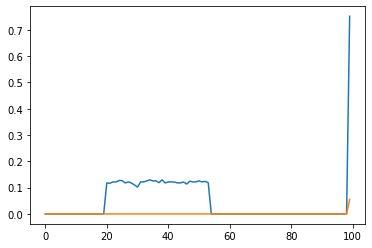

In [116]:
# plt.plot(predicted_positions['deeptrack'][:,1])
# plt.plot(predicted_positions['symmetry'][:,1])


(array([ 1.,  1.,  0.,  0.,  0.,  3.,  1.,  1.,  2.,  4.,  4.,  8.,  6.,  9., 12., 17., 12.,  8.,  3.,  3.,  2.,  0.,
         2.,  0.,  1.]),
 array([0.722525, 0.727209, 0.731893, 0.736578, 0.741262, 0.745946, 0.750631, 0.755315, 0.76    , 0.764684, 0.769368,
        0.774053, 0.778737, 0.783422, 0.788106, 0.79279 , 0.797475, 0.802159, 0.806844, 0.811528, 0.816212, 0.820897,
        0.825581, 0.830265, 0.83495 , 0.839634]),
 <a list of 25 Patch objects>)

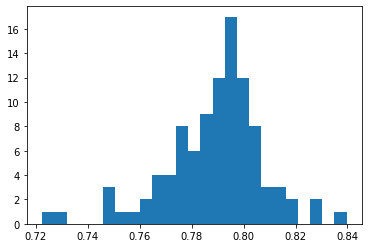

In [111]:
# plt.hist(predicted_positions['deeptrack'][:,1],bins=25)

In [117]:
# !ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 "../../DeepTrack 1.0/DeepTrack - Example 2 - Optically Trapped Particle Good.mp4"

100


In [230]:
# from PIL import Image, ImageDraw, ImageFont

# def annotate_video_with_predictions(video_file_name, predicted_positions):
    
#     vinput = av.open(video_file_name)
#     output = av.open(video_file_name[:-4]+'_a.mp4', mode='w')
    
#     stream = output.add_stream('h264', '23.976')
#     stream.width = 120
#     stream.height = 120
#     stream.pix_fmt = 'yuv420p'

#     number_frames_to_be_tracked = len(predicted_positions)
    
#     for i, frame in enumerate(vinput.decode(video=0)):
#         if i >= number_frames_to_be_tracked:
#             break
    
#         image = frame.to_image()
#         p=predicted_positions[i].numpy()*120/51
        
#         # annotate
#         draw=ImageDraw.Draw(image)
        
#         draw.rectangle( [60+p[0]-1,60+p[1]-1,60+p[0]+1,60+p[1]+1],  fill='#ff0')
#         draw.point( [60+p[0],60+p[1]],  fill='#000')
#         del draw
        
#         # write frame
#         new_frame = av.VideoFrame.from_image(image)
#         packet = stream.encode(new_frame)
#         output.mux(packet)
        
        
#     # flush
#     packet = stream.encode(None)
#     output.mux(packet)

#     output.close()
#     vinput.close()
#         # save frame
        
        

[{'deeptrack': []}, {'deeptrack': []}]

In [236]:
# video_file_name = '../../DeepTrack 1.0/DeepTrack - Example 2 - Optically Trapped Particle Bad.mp4'
# predicted_positions = track_single_particle(video_file_name, learner)
# annotate_video_with_predictions(video_file_name, predicted_positions)

In [244]:
%%HTML

<video width="400" height="400" controls>
<source src="../../DeepTrack 1.0/DeepTrack - Example 6 - Vesicles SNR4 mid.mp4" type="video/mp4">
</video>

TypeError: Image data of dtype object cannot be converted to float

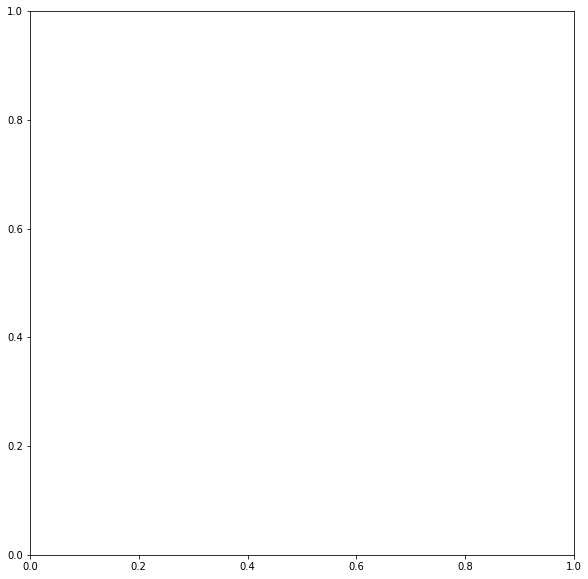

In [221]:
# ### Visualize tracked frames (maximum 10 frames at a time)
# from deeptracktorch.video import show_tracked_frames_single_particle
# show_tracked_frames_single_particle(
#     min(number_tracked_frames, 10), 
#     frames, 
#     predicted_positions)

In [80]:
# import cv2
# fourcc = cv2.VideoWriter_fourcc("MJPG")
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (120,120))
# for frame,pos in zip(frames, predicted_positions):
#     image = cv2.circle(frame, (int(pos[0]),int(pos[1])), radius=0, color=(0, 0, 255), thickness=-1)
#     out.write(np.uint8(frame))
# out.release()

TypeError: VideoWriter_fourcc() missing required argument 'c2' (pos 2)